# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [20]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [21]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [22]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

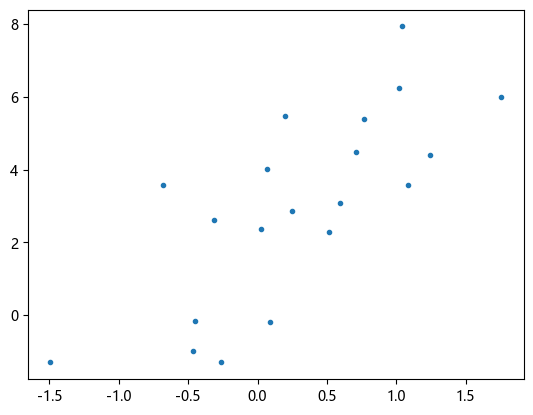

In [23]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [24]:
train_x=X[:15]
train_y=Y[:15]
test_x=X[15:]
test_y=Y[15:]

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

In [25]:
def polynomial_regression(x,y,x_test,y_test,n) :
    # 构造多项式矩阵
    def polynomial_matrix(x, n):
        m=x.shape[0]
        A=np.zeros((m,n+1))
        for i in range(n,-1,-1):
            A[:,n-i]=x**i
        return A

    def polynomial_fit_matrix(x,y,n):
        A=polynomial_matrix(x,n)
        ATA=A.T @ A
        ATY=A.T @ y
        theta=np.linalg.solve(ATA,ATY)
        return theta

    #得到系数矩阵
    theta=polynomial_fit_matrix(x,y,n)

    #预测值
    def predict_(test_data,theta,n):
        A_pre=polynomial_matrix(test_data,n )#构造预测数据的多项式矩阵
        y_pre=A_pre@theta
        return y_pre.T

    y_prd=predict_(x_test,theta,n)

    #计算mse
    MSE_=np.mean(np.square(y_prd-y_test.T))

    return theta,y_prd,MSE_




In [26]:
#模型训练，计算mse
theta_1,y_prd1,mse_1=polynomial_regression(train_x,train_y,train_x,train_y,1)
print("1次多项式拟合: MSE={}".format(mse_1))
theta_2,y_prd2,mse_2=polynomial_regression(train_x,train_y,train_x,train_y,2)
print("2次多项式拟合: MSE={}".format(mse_2))
theta_3,y_prd3,mse_3=polynomial_regression(train_x,train_y,train_x,train_y,3)
print("3次多项式拟合: MSE={}".format(mse_3))
theta_4,y_prd4,mse_4=polynomial_regression(train_x,train_y,train_x,train_y,4)
print("4次多项式拟合: MSE={}".format(mse_4))

1次多项式拟合: MSE=3.6141199809365925
2次多项式拟合: MSE=3.4709875708912987
3次多项式拟合: MSE=3.010246815533374
4次多项式拟合: MSE=2.3971661654711824


### 可以看出模型4次多项式拟合的拟合程度更好

## 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

In [27]:
theta_1,y_prd1_test,mse_1_tset=polynomial_regression(train_x,train_y,test_x,test_y,1)
print("1次多项式拟合: MSE={}".format(mse_1_tset))
theta_2,y_prd2_test,mse_2_test=polynomial_regression(train_x,train_y,test_x,test_y,2)
print("2次多项式拟合: MSE={}".format(mse_2_test))
theta_3,y_prd3_test,mse_3_test=polynomial_regression(train_x,train_y,test_x,test_y,3)
print("3次多项式拟合: MSE={}".format(mse_3_test))
theta_4,y_prd4_tset,mse_4_test=polynomial_regression(train_x,train_y,test_x,test_y,4)
print("4次多项式拟合: MSE={}".format(mse_4_test))

1次多项式拟合: MSE=1.9373288022689104
2次多项式拟合: MSE=6.9248859162616485
3次多项式拟合: MSE=145.53829178692104
4次多项式拟合: MSE=2717.4997768004077


(-5.0, 35.0)

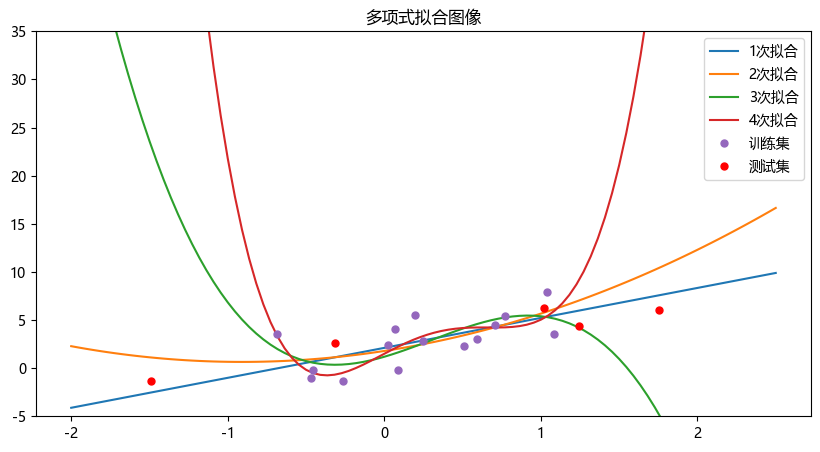

In [28]:

plt.rcParams['font.family'] = 'Microsoft YaHei'  # 指定中文字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


def polynomial_matrix(x, n):
    m=x.shape[0]
    A=np.zeros((m,n+1))
    for i in range(n,-1,-1):
        A[:,n-i]=x**i
    return A

def nihe_lines(theta,n):
    X=np.linspace(-2,2.5,100)
    X_matrix=polynomial_matrix(X,n)
    Y=X_matrix@theta
    plt.plot(X,Y,'-',label="{}次拟合".format(n))
plt.figure(figsize=(10,5))
nihe_lines(theta_1,1)
nihe_lines(theta_2,2)
nihe_lines(theta_3,3)
nihe_lines(theta_4,4)
plt.plot(train_x,train_y,'.',label="训练集",markersize=10)
plt.plot(test_x,test_y,'r.',label="测试集",markersize=10)
plt.title('多项式拟合图像')
plt.legend()
plt.ylim(-5,35)

1.2和1.3的答案是否相同？两者的异同有什么意义？

### 答案不同
### 1.2计算模型与训练集的均方误差值的大小表现的是模型对于训练集的拟合程度，MSE小说明模型的拟合好，但是在测试集上，随着多项式次数的增高，均方误差逐渐增大。当模型在训练集上表现优秀但在测试集上表现较差时但是不能完全反应模型对于预测数据的预测能力，容易出现过拟合的现象，说明模型的拟合能力、泛化能力并不是随着多项式次数的增加而增加。在这种情况下，我们需要尝试简化模型或者采取其他方法来解决过拟合问题，例如正则化、增加数据集等来解决。
### 1.3计算模型与测试集的均方误差值的大小表现的是模型对于测试集的预测能力，MSE越小说明模型的泛化能力强，对于未知数据的预测准确度很高，能够表现模型的好坏程度

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

### ReLU函数的公式为：
$$ f(x) = \max(0, x) $$
### Sigmoid函数公式
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$


### 写出整个神经网络的公式

$$y=\text{ReLU}(W_2\sigma(W_1x+b_1)+b_2)$$
其中，$x$是输入向量，$W_1$和$b_1$是第一层的权重和偏置,$W_2$和$b_2$是第二层的权重和偏置，$y$是最终输出的标量，$\sigma$是是Sigmoid激活函数，$\text{ReLU}$是ReLU激活函数。



### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [29]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [30]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [31]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [32]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [33]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [34]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [35]:
b2 = np.array([[0.277288]])

In [36]:
import numpy as np

# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# 定义神经网络
def neural_network(x,W1,B1,W2,B2):

    # 前向传播
    z1 = np.dot(x , W1) + B1
    a1 = sigmoid(z1)

    z2 = np.dot( a1,W2) + B2
    y = relu(z2)

    return y,z1,z2,a1

# 计算均方差损失
def mse_loss(y_pred, y_true):
    return np.mean(np.square(y_pred - y_true))



# 运行神经网络
y_pred,z1,z2,a1 = neural_network(X ,W1,b1,W2,b2)

# 计算均方差损失
loss = mse_loss(y_pred, Y)

print("神经网络输出预测值:\n", y_pred)
print("均方差损失:", loss)


神经网络输出预测值:
 [[2.18514844]
 [1.35081552]
 [2.09965131]
 [1.98338406]]
均方差损失: 2.80688883177308


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [37]:
def backward_propagation(x, y_pred, y_true, z1, z2, a1, W1, W2):

    # 计算输出层的梯度
    dL_dz2 = 2 * (y_pred - y_true)  # 损失函数对输出层输入的导数
    dz2_dw2 = a1  # 输出层输入对权重W2的导数
    dL_dw2 = np.dot(dz2_dw2.T, dL_dz2)  # 损失函数对W2的导数
    dL_db2 = np.sum(dL_dz2, axis=0)  # 损失函数对b2的导数

    # 计算隐藏层的梯度
    dz2_da1 = W2  # 输出层输入对隐藏层输出的导数
    da1_dz1 = sigmoid(z1) * (1 - sigmoid(z1))  # 隐藏层输出对隐藏层输入的导数      根据Sigmoid函数的导数性质，导数等于Sigmoid函数值乘以1减去Sigmoid函数值本身。
    dz1_dw1 = x  # 隐藏层输入对权重W1的导数
    dL_da1 = np.dot(dL_dz2, dz2_da1.T)  # 损失函数对隐藏层输出的导数
    dL_dz1 = dL_da1 * da1_dz1  # 损失函数对隐藏层输入的导数
    dL_dw1 = np.dot(dz1_dw1.T, dL_dz1)  # 损失函数对W1的导数
    dL_db1 = np.sum(dL_dz1, axis=0)  # 损失函数对b1的导数

    return dL_dw1, dL_db1, dL_dw2, dL_db2

dL_dw1, dL_db1, dL_dw2, dL_db2 = backward_propagation(X, y_pred, Y, z1, z2, a1, W1, W2)

print("dL/dW1:\n", dL_dw1)
print("dL/dB1:\n", dL_db1)
print("dL/dW2:\n", dL_dw2)
print("dL/dB2:\n", dL_db2)


dL/dW1:
 [[-0.40251271 -0.00182187  0.04910962 -0.51554188 -0.18737055]
 [ 0.64416028 -0.01111573  0.81370538  0.2788146   0.57317828]]
dL/dB1:
 [ 1.81363805 -0.02733097  2.17171217  1.43887619  2.10922068]
dL/dW2:
 [[4.8221678 ]
 [5.34072698]
 [2.64623548]
 [9.70428608]
 [4.25731321]]
dL/dB2:
 [11.74482637]
